In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from IPython import display
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
import warnings
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
os.chdir('C:\Files\parkinson')
info = pd.read_excel('Info.xlsx')
info = info.fillna(value = -1)
info.head(5)

,date,ID,ФИО,пол,возраст,Степень Паркинсона,Травмы/Патологии/Болезни,Баг в эксперименте1,Баг в эксперименте2,index1,index2,Unnamed: 11,postural,kinetic,rest
0,-1,1,Екатерина К,ж,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
1,-1,2,Анна Т,ж,23.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
2,-1,3,Александр Т,м,22.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
3,-1,4,Иван Д,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
4,-1,5,Дмитрий Е,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0


In [3]:
timing_per_exercise = {}
os.chdir('C:/Files/parkinson/PatientDataV2/')
path = 'C:/Files/parkinson/PatientDataV2/'
feature = {}
file = {}
list_files = os.listdir()
count = 0
for name in list_files:
    if '.' in name:
        continue
    index = [int(name[7:])]
    print(name)
    patient_info = info[info['ID'] == index[0]]
    folders = os.listdir(path + name)
    for fold in folders:
        if '.' in fold:
            continue

        patient = pm.parkinson(path + name + '/' + fold)
        patient.read()
        df_per_exer = {}
        for exer_keys in patient.exercises:
            if exer_keys not in timing_per_exercise:
                timing_per_exercise[exer_keys] = []
            
            exers = patient.exercises[exer_keys]
            timing = patient.time[exer_keys]
            timing_per_exercise[exer_keys].append(timing.values[-1])
            df = pm.calculate_batch({key : exers[key] for key in pm.columns_acc},
                                    {key : exers[key] for key in pm.columns_hyr},
                                    {key : exers[key] for key in pm.columns_mag},
                                     timing, patient_info, int(fold.split('_')[0]), file, exer_keys, index, win_size = 500, overlap=80)
            df_per_exer[exer_keys] = df
        file[fold] = df_per_exer

patient01


KeyboardInterrupt: 

In [5]:
# features = pm.feature_extract(file, calculate_fourier_feature=False)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [ ]:
with open('C:/Files/parkinson/sensordata_per_name_per_exercise.pkl', 'wb') as f:
    pickle.dump(file, f)

In [ ]:
with open('C:/Files/parkinson/sensordata_per_name_per_exercise.pkl', 'rb') as f:
    file = pickle.load(f)

In [4]:
name

NameError: name 'name' is not defined

In [3]:
# features_per_name = {}

# for name in file:

#     print(name)
#     features_per_exer ={}
#     for exer_keys in file[name]:
#         if len(file[name][exer_keys]) < 1:
#             continue
#         features = pm.feature_extract(file[name][exer_keys])
#         features_per_exer[exer_keys] = features
#     features_per_name[name] = features_per_exer
# with open('C:/Files/parkinson/features_per_name_per_exercise.pkl', 'wb') as f:
#     pickle.dump(features_per_name, f)
with open('C:/Files/parkinson/features_per_name_per_exercise.pkl', 'rb') as f:
    features_per_name = pickle.load(f)

In [5]:
features.head()

AttributeError: 'dict' object has no attribute 'head'

In [7]:
for i in features.index:
    print(features.name[i], features.exercise_index[i])
    break

69 9


In [8]:
columns = []
for exer in range(1,16):
    columns += [str(exer) + ' exer, ' + col for col in features.drop(columns= ['target','name','exercise_index']).columns]

In [9]:
columns[i][(columns[i].find('exer,') + 6):]

'acc_x, mg_std'

In [10]:
name = '12'

In [11]:
features[features.name == name][features.exercise_index == 1]['acc_x, mg_std'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
data_dct = {}

for person in features.name.unique():
    print(person)
    data_dct[person] = []
    for col in columns:
        exer = int(col.split(' ')[0])
        col_name = col[(col.find('exer,') + 6):]
        exer_keys = features[features.name == person].exercise_index.values

        if exer in exer_keys:
            try:
                value = features[features.name == person][features.exercise_index == exer][col_name].values[0]
            except:
                print(exer)
                print(exer_keys)
                print(features[features.name == person][features.exercise_index == exer][col_name])
                break
        else: 
            value = np.NAN
#         print(value)
        data_dct[person].append(value)


69


KeyboardInterrupt: 

In [77]:
data = pd.DataFrame(data=data_dct).T.values

In [81]:
data_combine_exercise = pd.DataFrame(data= data, columns= columns)
data_combine_exercise['name'] = data_dct.keys()
data_combine_exercise['name'] = data_combine_exercise['name'].map(lambda name: int(name.split('_')[0]))
data_combine_exercise = data_combine_exercise.fillna(-1)

In [152]:
features_per_name['patient01'][10].head()

,"acc_x, mg_std","acc_x, mg_mean","acc_x, mg_max","acc_x, mg_min","acc_x, mg_skew","acc_x, mg_kurtosis","acc_x, mg_differential_mean","acc_x, mg_differential_std","acc_x, mg_noise_std","acc_x, mg_noise_mean",...,"mag_z, mga_trend_less3hz_peaks_amplitude_mean","mag_z, mga_trend_less3hz_peaks_amplitude_std","mag_z, mga_trend_less3hz_peaks_amplitude_min","mag_z, mga_trend_less3hz_peaks_amplitude_max","mag_z, mga_trend_less3hz_dominant_amplitude","mag_z, mga_trend_spectrum_energy_mean","mag_z, mga_trend_spectrum_energy_std",name,target,exercise_index
0,129.938784,-2.438981,547.551641,-429.054497,0.789554,3.177056,30.499628,628.981455,0.960342,0.007561,...,14.402076,5.624735,9.231624,23.573835,14.362368,15.851390,46.456724,1,0,10
1,126.085950,0.760164,547.551641,-429.054497,0.722132,3.233881,27.605587,642.583273,0.932330,-0.003211,...,40.874453,20.885206,28.433752,77.046049,28.878285,69.472775,419.150905,1,0,10
2,119.833897,-1.631803,547.551641,-340.026527,1.083974,3.685733,26.558546,609.524180,0.933671,0.008049,...,47.027377,4.595146,42.041391,53.129803,53.129803,75.957918,322.284173,1,0,10
3,114.977258,0.919398,756.993548,-481.783805,1.221089,6.233235,49.770499,683.514760,0.959030,-0.008214,...,41.476017,14.710420,26.805983,64.653732,31.018179,71.425444,350.398233,1,0,10
4,120.336479,0.404865,756.993548,-481.783805,1.310694,5.722451,30.649452,694.417151,0.955801,0.008276,...,42.030498,14.525062,25.732025,65.059094,35.108334,73.201351,346.473429,1,0,10


In [6]:
names_list = []
index_list = []
for name in features_per_name:
    exer = list(features_per_name[name].keys())
    if  ((11 in exer) and (8 in exer) and (10 in exer)  and (6 in exer) and (7 in exer) and (12 in exer)
            and (9 in exer) and (1 in exer)  and (2 in exer) and (3 in exer) and (4 in exer)  and (5 in exer)):
        names_list.append(name)
#         if int(name.split('_')[0]) not in index_list:
#             index_list.append(int(name.split('_')[0]))

In [7]:
len(names_list)

82

In [8]:
names_list

['01_2',
 '02',
 '02_2',
 '03',
 '03_2',
 '04',
 '04_2',
 '05',
 '05_2',
 '06',
 '06_2',
 '07',
 '07_2',
 '08_2',
 '09',
 '09_2',
 '10_2',
 '11',
 '12',
 '12_2',
 '13_2',
 '14',
 '14_2',
 '15',
 '15_2',
 '16',
 '16_2',
 '17',
 '17_02',
 '18',
 '19',
 '20',
 '20_2',
 '22',
 '22_2',
 '23',
 '24',
 '24_2',
 '25_2',
 '26',
 '27',
 '28',
 '28_2',
 '29',
 '30',
 '31',
 '32',
 '32_2',
 '33',
 '33_2',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '42_2',
 '43',
 '43_2',
 '44',
 '45_2',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '53_2',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '62',
 '63',
 '64',
 '65',
 '68']

In [16]:
total_df = pd.DataFrame()
for name in names_list:
    print(name)
    df = pd.DataFrame()
    minimum = 1024
    for exer in [11,10,6,9,8,1,2,3,4,5,7]:
        minimum = min(minimum, len(features_per_name[name][exer]))
    for exer in [11,10,6,9,8,1,2,3,4,5,7]:
        data = features_per_name[name][exer]
        for col in data.columns:
            if col in ['target', 'name', 'exercise_index']:
                continue
            df[col + ' exer_' + str(exer)] = data[col][:minimum]
        
    df['target'] = features_per_name[name][11]['target'][:minimum]
    df['name'] = features_per_name[name][11]['name'][:minimum]
    
    total_df = total_df.append(df, ignore_index = True)

01_2
02
02_2
03
03_2
04
04_2
05
05_2
06
06_2
07
07_2
08_2
09
09_2
10_2
11
12
12_2
13_2
14
14_2
15
15_2
16
16_2
17
17_02
18
19
20
20_2
22
22_2
23
24
24_2
25_2
26
27
28
28_2
29
30
31
32
32_2
33
33_2
34
35
36
37
38
39
40
42_2
43
43_2
44
45_2
47
48
49
50
51
52
53
53_2
54
55
56
57
58
59
60
62
63
64
65
68


In [17]:
total_df.to_csv('C:/Files/parkinson/total_df_features_overlap.csv', sep = ';')

In [3]:
total_df = pd.read_csv('C:/Files/parkinson/total_df_features_overlap.csv', sep = ';')
total_df = total_df.drop(columns= ['Unnamed: 0'])

In [4]:
total_df.head()

,"acc_x, mg_std exer_11","acc_x, mg_mean exer_11","acc_x, mg_max exer_11","acc_x, mg_min exer_11","acc_x, mg_skew exer_11","acc_x, mg_kurtosis exer_11","acc_x, mg_differential_mean exer_11","acc_x, mg_differential_std exer_11","acc_x, mg_noise_std exer_11","acc_x, mg_noise_mean exer_11",...,"mag_z, mga_trend_less3hz_dominant_frequency exer_7","mag_z, mga_trend_less3hz_peaks_amplitude_mean exer_7","mag_z, mga_trend_less3hz_peaks_amplitude_std exer_7","mag_z, mga_trend_less3hz_peaks_amplitude_min exer_7","mag_z, mga_trend_less3hz_peaks_amplitude_max exer_7","mag_z, mga_trend_less3hz_dominant_amplitude exer_7","mag_z, mga_trend_spectrum_energy_mean exer_7","mag_z, mga_trend_spectrum_energy_std exer_7",target,name
0,100.910817,8.734807,516.469713,-335.425933,0.941303,4.157304,-0.563177,510.292263,0.822630,-0.011387,...,0.573402,89.402488,19.994324,73.008081,123.313873,123.313873,294.497068,1487.506734,0,1
1,99.717438,-1.157245,626.460448,-335.425933,1.385594,7.946668,19.860904,621.202585,0.921145,0.017458,...,0.573287,86.621555,35.623777,47.294694,147.856619,116.328103,336.353372,1852.255866,0,1
2,95.926349,-0.966375,626.460448,-314.422122,1.889039,10.291981,24.367676,635.352741,0.983965,-0.001439,...,0.577659,75.671992,33.521381,43.903759,143.612182,85.272441,325.947004,1784.831187,0,1
3,101.415030,-0.284240,626.460448,-314.422122,1.981605,10.363291,21.047659,640.203442,0.984746,-0.001983,...,0.725613,91.587557,45.519956,40.120830,147.302713,125.003731,262.344523,1753.622050,0,1
4,165.990344,1.388954,401.044310,-749.159322,-1.461344,3.282007,-12.539828,709.897741,0.969201,0.005970,...,1.021668,100.665856,49.433140,51.232716,150.098995,150.098995,265.560329,1910.078803,0,2


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from fylearn.nfpc import FuzzyPatternClassifier
from fylearn.garules import MultimodalEvolutionaryClassifier
from fylearn.fpt import FuzzyPatternTreeTopDownClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

FPC = FuzzyPatternClassifier()
MEC = MultimodalEvolutionaryClassifier(n_iterations= 20)
FPC = FuzzyPatternTreeTopDownClassifier()
parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС1 = RandomForestClassifier(n_estimators = 30, max_depth = 5, class_weight = 'balanced')
RFС2 = RandomForestClassifier(n_estimators = 40, max_depth = 5, class_weight = 'balanced')
RFС3 = RandomForestClassifier(n_estimators = 50, max_depth = 5, class_weight = 'balanced')
RFС4 = RandomForestClassifier(n_estimators = 60, max_depth = 5, class_weight = 'balanced')

LinSVM = SVC(kernel = 'linear')
RbfSVM = SVC(kernel = 'rbf', probability = True)
PolySVM = SVC(kernel = 'poly')
KNN = KNeighborsClassifier()
NB = GaussianNB()
LR = LogisticRegression()
DT = DecisionTreeClassifier(max_depth = 100)
QDA = QuadraticDiscriminantAnalysis()
GP = GaussianProcessClassifier(1.0 * RBF(1.0))

classifiers = {
     'RF 30 5' : RFС1,
#      'RF 40 5' : RFС2,
#      'RF 50 5' : RFС3,
     'RF 60 5' : RFС4,
#      'Linear SVM' : LinSVM,
#      'rbf SVM' : RbfSVM,
#      'poly SVM': PolySVM,
     'KNN' : KNN, 
#      'NB' : NB,
     'LR' : LR,
#      'DT' : DT,
#      'GaussProcess' : GP,
#      'QDA' : QDA
#      'Fuzzy Pattern' : FPC,
#      'MultiModalEvolutionary' : MEC,
#      'FuzzyPatternTreeTopDown' : FPC
}

In [6]:
RFC_f = RandomForestClassifier(n_estimators= 40, max_depth= 5)
RFC_f.fit(total_df[ (total_df['target'] != 4) + (total_df['target'] != 3)].drop(columns=['target','name']), total_df[ (total_df['target'] != 4) + (total_df['target'] != 3)]['target'])
features = (pd.Series(RFC_f.feature_importances_, index = total_df.drop(columns=['target','name']).columns).sort_values(ascending = False)).keys()[:50]

In [7]:
FI = pd.Series(RFC_f.feature_importances_, index = total_df.drop(columns=['target','name']).columns).sort_values(ascending = False)

In [8]:
FI.keys()

Index(['mag_z, mga_min exer_2',
       'acc_z, mg_noise_more3hz_peaks_freq_mean exer_2',
       'mag_x, mga_differential_std exer_1',
       'mag_x, mga_differential_std exer_6', 'mag_x, mga_std exer_2',
       'mag_x, mga_max exer_2', 'mag_z, mga_noise_std exer_1',
       'mag_x, mga_std exer_1', 'mag_z, mga_std exer_2',
       'mag_y, mga_std exer_3',
       ...
       'acc_y, mg_trend_more3hz_peaks_freq_mean exer_3',
       'acc_y, mg_trend_more3hz_peaks_freq_std exer_3',
       'acc_y, mg_trend_more3hz_peaks_freq_min exer_3',
       'acc_y, mg_trend_more3hz_peaks_freq_max exer_3',
       'acc_y, mg_trend_more3hz_dominant_frequency exer_3',
       'acc_y, mg_trend_more3hz_peaks_amplitude_mean exer_3',
       'acc_y, mg_trend_more3hz_peaks_amplitude_std exer_3',
       'acc_y, mg_trend_more3hz_peaks_amplitude_min exer_3',
       'acc_y, mg_trend_more3hz_peaks_amplitude_max exer_3',
       'acc_x, mg_std exer_11'],
      dtype='object', length=5346)

### all class

In [9]:
for feat in FI:
    print(feat)
    break

0.026336066047007202


In [9]:
early_total_df = total_df[(total_df['target'] == 0) + (total_df['target'] == 1)]

Parkinson_total_df = total_df[total_df['target'] != 4].copy()
Parkinson_total_df['target'] = np.array(Parkinson_total_df['target'] > 0.5, np.int)

bin_total_df = total_df.copy()
bin_total_df['target'] = np.array(bin_total_df['target'] > 0, dtype = np.int)

pon_total_df = total_df[total_df['target'] != 0].copy()
pon_total_df['target'] = np.array(pon_total_df['target'] > 3.5, np.int)


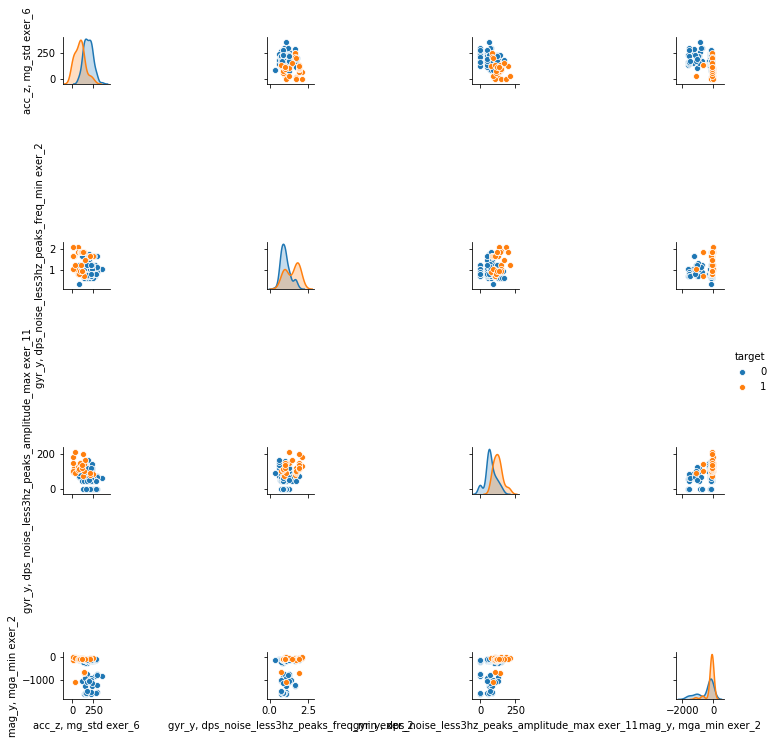

In [39]:
newdf = pd.DataFrame()

RFC_f = RandomForestClassifier(n_estimators= 40, max_depth= 5)
RFC_f.fit(early_total_df[(early_total_df['target'] == 0) + (early_total_df['target'] == 1)].drop(columns=['target','name']),
          early_total_df[(early_total_df['target'] == 0) + (early_total_df['target'] == 1)]['target'])
features_early = (pd.Series(RFC_f.feature_importances_, 
            index = early_total_df.drop(columns=['target','name']).columns).sort_values(ascending = False)).keys()[:50]
for i in features_early[:4]:
    newdf[i] = early_total_df[i]
newdf['target'] = early_total_df['target'].map({0:0, 4:2, 1:1, 2:1, 3:1})

sns.pairplot(data=newdf, vars= features_early[:4], hue = "target")
plt.show()

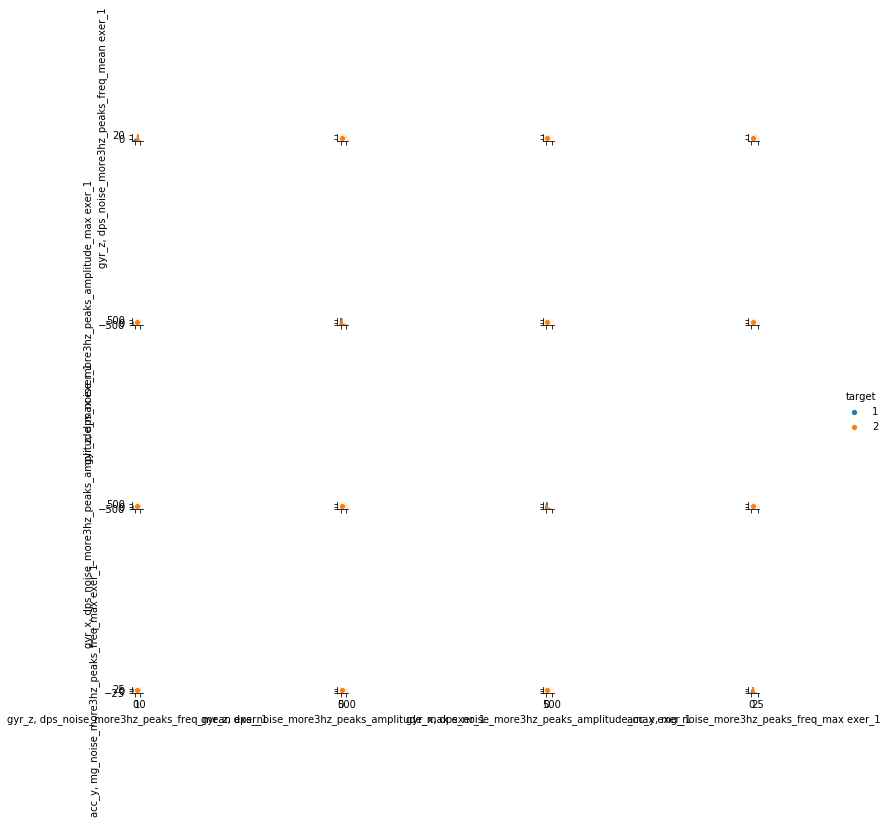

In [40]:
newdf = pd.DataFrame()
total_df_early = total_df[(total_df['target'] == 1) + (total_df['target'] == 2)]

RFC_f = RandomForestClassifier(n_estimators= 40, max_depth= 5)
RFC_f.fit(total_df_early[(total_df_early['target'] == 1) + (total_df_early['target'] == 2)].drop(columns=['target','name']),
          total_df_early[(total_df_early['target'] == 1) + (total_df_early['target'] == 2)]['target'])
features_early = (pd.Series(RFC_f.feature_importances_, 
            index = total_df_early.drop(columns=['target','name']).columns).sort_values(ascending = False)).keys()[:50]
for i in features_early[:4]:
    newdf[i] = total_df_early[i]
newdf['target'] = total_df_early['target'].map({0:0, 4:2, 1:1, 2:2, 3:1})

sns.pairplot(data=newdf, vars= features_early[:4], hue = "target")
plt.show()

In [49]:
# total_df = total_df.drop(columns=['Unnamed: 0'])

In [10]:
dct = {}
feature_names = total_df.drop(columns=['target', 'name']).columns
for name in feature_names:
    exr_idx = int(name.split('_')[-1])
    if exr_idx not in dct:
        dct[exr_idx] = []
    dct[exr_idx].append(name)

RFC_f = RandomForestClassifier(n_estimators= 40, max_depth= 5)
features_dct = {}
for exer in dct:
    feature_names = dct[exer]
    df = total_df.iloc[:int(0.66*len(total_df))]
    RFC_f.fit(df[feature_names], df['target'])
    features_early = (pd.Series(RFC_f.feature_importances_, 
            index = df[feature_names].columns).sort_values(ascending = False))
    features_early = list(features_early.keys()[:40])
    features_dct[exer] = features_early

In [10]:
    features_early = (pd.Series(RFC_f.feature_importances_, 
            index = df[feature_names].columns).sort_values(ascending = False))

100
1 0.04112952225187015 0.0003076682838736484 0.0
2 0.05954270065704535 0.0005377973771254821 0.0
3 0.041246785267120153 0.00030628374295675023 0.0
4 0.007859848713398407 6.613247708329047e-05 0.0
5 0.01246734030316736 8.920024799066265e-05 0.0
6 0.03225737533485338 0.00022602488220372987 0.0
7 0.0133316510692683 7.197548781577688e-05 0.0
8 0.01544318302653693 0.00014771555295296345 0.0
9 0.007856596606233113 5.292280675283536e-05 0.0
10 0.03610275317728214 0.00018091952551154482 0.0
11 0.012911663521468997 7.097278445759561e-05 0.0


<BarContainer object of 11 artists>

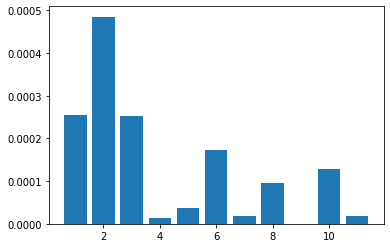

In [17]:
df = bin_total_df.copy()
y = df['target']
X = df.drop(columns= ['target', 'name'])

features_values_dct = {i:[] for i in range(1,12)}
count_values_dct = {i:0 for i in range(1,12)}

for k in range(100):
    if k%100 == 99:
        print(k + 1)
    arr = np.arange(X.values.shape[1])
    np.random.shuffle(arr)
    X_resample = X.values.T[arr].T
    RFC_f.fit(X_resample, df['target'])
    features_early = (pd.Series(RFC_f.feature_importances_, 
                    index = arr).sort_values(ascending = False))
    for arr_i in features_early.keys():
        feat = X.columns[arr_i]
        val = features_early[arr_i]
#         print(val, feat)
    #     print(features_early[feat], feat)
    #     val, index = features_early[feat], int(feat.split('_')[-1])
        index = int(feat.split('_')[-1])
        features_values_dct[index].append(val)
        count_values_dct[index] += 1
        
for i in features_values_dct:
    features_values_dct[i] = np.array(features_values_dct[i])
    #     break
minimum = 100000.0
for i in features_values_dct:
    print(i, np.max(features_values_dct[i]), np.mean(features_values_dct[i]), np.median(features_values_dct[i]))
    minimum = min(minimum, np.mean(features_values_dct[i]))
plt.bar(features_values_dct.keys(), [np.mean(features_values_dct[i]) - minimum for i in features_values_dct])

In [11]:
from sklearn.feature_selection import chi2

In [74]:
y = df['target']
X = df.drop(columns= ['target', 'name'])

100
200
300
400
500
600
700
800
900
1000
1 67029.53628629397 690.1242166921932 20.49185103381445
2 67029.53628629397 680.4596384054214 20.581457861424383
3 67029.53628629397 688.2651910235771 20.41707397431014
4 67029.53628629397 688.6098790382198 20.41707397431014
5 67029.53628629397 688.7972583950633 20.433205627502993
6 67029.53628629397 685.5709129195061 20.41707397431014
7 67029.53628629397 682.3172438241392 20.355893326390838
8 67029.53628629397 680.8356210176105 20.41707397431014
9 67029.53628629397 673.4667474426691 20.22325473113977
10 67029.53628629397 684.9669224852356 20.452223842895908
11 67029.53628629397 686.9213663334838 20.41707397431014


<BarContainer object of 11 artists>

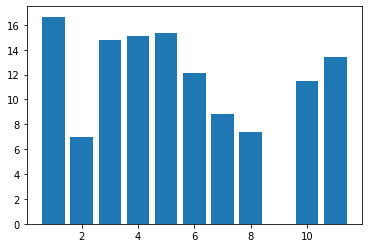

In [18]:
features_values_dct = {i:[] for i in range(1,12)}
count_values_dct = {i:0 for i in range(1,12)}

for k in range(1000):
    if k%100 == 99:
        print(k + 1)
    arr = np.arange(X.values.shape[1])
    np.random.shuffle(arr)
    X_resample = X.values.T[arr]
    chi, _ = chi2(X.abs(), y)
    for val, arr_i in zip(chi, arr):
        feat = X.columns[arr_i]
    #     print(val, feat)
    #     print(features_early[feat], feat)
    #     val, index = features_early[feat], int(feat.split('_')[-1])
        index = int(feat.split('_')[-1])
        features_values_dct[index].append(val)
        count_values_dct[index] += 1
        
minimum = 100000.0
for i in features_values_dct:
    print(i, np.max(features_values_dct[i]), np.mean(features_values_dct[i]), np.median(features_values_dct[i]))
    minimum = min(minimum, np.mean(features_values_dct[i]))
plt.bar(features_values_dct.keys(), [np.mean(features_values_dct[i]) - minimum for i in features_values_dct])

In [15]:

for i in features_values_dct:
    print(i, np.max(features_values_dct[i]), np.mean(features_values_dct[i]), np.median(features_values_dct[i]))

1 67029.53628629397 681.8972340629443 20.452223842895908
2 67029.53628629397 684.2182689813181 20.41707397431014
3 67029.53628629397 684.68923279136 20.41707397431014
4 67029.53628629397 682.9828817829026 20.22325473113977
5 67029.53628629397 684.9623118522256 20.66432239588745
6 67029.53628629397 684.9778345539412 20.47892410747263
7 67029.53628629397 694.3031986309876 20.452223842895908
8 67029.53628629397 683.1674912651039 20.452223842895908
9 67029.53628629397 679.2617617339299 20.355893326390838
10 67029.53628629397 680.9217180611606 20.31251667249939
11 67029.53628629397 688.9530638612455 20.41707397431014


In [56]:
features_values_dct

{1: 1895161.928291188,
 2: 663900.1414822455,
 3: 406310.27453089703,
 4: 335476.55924493866,
 5: 463445.65050407697,
 6: 528551.5787147157,
 7: 383506.2605555712,
 8: 774680.2871995713,
 9: 560276.9173905328,
 10: 599148.4828342142,
 11: 495336.9212361192}

In [13]:
bin_total_df.target.unique(), Parkinson_total_df.target.unique(), total_df.target.unique()

(array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 4, 2, 3, 1], dtype=int64))

In [12]:
def small_predict(train_features, test_features, classifiers, 
                  parkinson_stage = True, balanced_accuracy = True, predict_proba = False):
    X_train = train_features
    X_test  = test_features
    y_train = X_train['target']
    y_test  = X_test['target']

    X_train = X_train.drop(columns= ['target'])
    X_test  = X_test.drop(columns= ['target'])

    X_train = pm.sclr.fit_transform(X_train)
    X_test  = pm.sclr.transform(X_test)
    df = pd.DataFrame()
#     df['train_len'] = [len(y_train)]
#     df['test_len'] = [len(y_test)]
#     print(y_test.shape, y_train.shape)
    for key in classifiers:
#         print(key)
        model = classifiers[key]
        model.fit(X_train, y_train)
        if predict_proba:
            y_pred = [model.predict_proba(X_test)]
        else:
            y_pred = model.predict(X_test)
#         print(len(y_pred))
        s = y_pred
        df[key] = y_pred
    
#     df['target'] = y_test
    

    return df

def predict_per_person(df, classifiers, features, predict_proba = False):
    results_with_double_exercise = pd.DataFrame()
    for name in df['name'].unique():
        test  = df[df['name'] == name][features + ['target']]
        train = df[df['name'] != name][features + ['target']]
        results = small_predict(train, test, classifiers, parkinson_stage = False, balanced_accuracy = False, predict_proba = predict_proba)
#         print(results.shape, test.shape)
#         print(test['target'])
        if predict_proba:
            results['target'] = [test['target'].values]
        else:
            results['target'] = test['target'].values
#         print(results['target'])
#         results['name'] = name
        results_with_double_exercise = results_with_double_exercise.append(results, ignore_index = True)
    return results_with_double_exercise
def predict_per_pair(df, pair, classifiers, features_dct):
    feature_names = []
    for first in pair:
        feature_names += features_dct[first]
    datka = predict_per_person(df, classifiers, feature_names, predict_proba = True)
    for i in datka.index:
        if i == 0:
            y_pred = datka[datka.columns[0]][0]
            y_true = np.array(datka['target'][0])
            continue
        y_pred = np.concatenate((y_pred, datka[datka.columns[0]][i]))
        y_true = np.concatenate((y_true, datka['target'][i]))
    return y_pred, y_true

def to_balanced_accuracy(X, y):
    to_return = pd.DataFrame()
    for col in X:
        to_return[col] = [pm.balanced_accuracy_score(X[col], y)]
    return to_return

In [15]:
early_total_df.target.value_counts()

0    103
1     31
Name: target, dtype: int64

In [23]:

parkinson_results_per_pair = dict()
# bin_results_per_pair = dict()
# total_results_per_pair = dict()
# pon_results_per_pair = dict()

In [24]:
import itertools
import time
iter_list = []
for m in range(3, 4):
    iter_list += list(itertools.combinations(dct.keys(), m))
print(len(iter_list))
st = time.time()
for pair in iter_list:
    print(pair, time.time() - st)
    st = time.time()
    feature_names = []
    for first in pair:
        feature_names += features_dct[first]
#     datka = predict_per_person(Parkinson_total_df, classifiers, feature_names, predict_proba=True)
    
    
#     parkinson_results_per_pair[pair] = datka.copy()
#     = parkinson_results_per_pair.append(
#         to_balanced_accuracy(datka.drop(columns = ['target']), datka['target'] ), ignore_index = True
#     )
    
    datka = predict_per_person(Parkinson_total_df, classifiers, feature_names, predict_proba=True)
    parkinson_results_per_pair[pair] = datka.copy()
#     = bin_results_per_pair.append(
#         to_balanced_accuracy(datka.drop(columns = ['target']), datka['target'] ), ignore_index = True
#     )

#     datka = predict_per_person(pon_total_df, classifiers, feature_names, predict_proba=True)
#     pon_results_per_pair[pair] = datka.copy()
#     = pon_results_per_pair.append(
#         to_balanced_accuracy(datka.drop(columns = ['target']), datka['target'] ), ignore_index = True
#     )
#     break
parkinson_results_per_pair['pair'] = iter_list
# bin_results_per_pair['pair']       = iter_list
# pon_results_per_pair['pair']       = iter_list

165
(11, 10, 6) 0.0
(11, 10, 9) 7.511996746063232
(11, 10, 8) 7.578826665878296
(11, 10, 1) 7.51076078414917
(11, 10, 2) 7.55832052230835
(11, 10, 3) 7.371378421783447
(11, 10, 4) 7.525355577468872
(11, 10, 5) 7.638220548629761
(11, 10, 7) 7.599020957946777
(11, 6, 9) 7.582835674285889
(11, 6, 8) 7.511074066162109
(11, 6, 1) 7.466154336929321
(11, 6, 2) 7.445938348770142
(11, 6, 3) 7.318890810012817
(11, 6, 4) 7.501329183578491
(11, 6, 5) 7.5381128787994385
(11, 6, 7) 7.503902912139893
(11, 9, 8) 7.486547946929932
(11, 9, 1) 7.532740592956543
(11, 9, 2) 7.543212890625
(11, 9, 3) 7.396165609359741
(11, 9, 4) 7.532541751861572
(11, 9, 5) 7.715747833251953
(11, 9, 7) 7.662892580032349
(11, 8, 1) 7.664875030517578
(11, 8, 2) 7.514199495315552
(11, 8, 3) 7.380375146865845
(11, 8, 4) 7.496549367904663
(11, 8, 5) 7.5787553787231445
(11, 8, 7) 7.5351903438568115
(11, 1, 2) 7.57581090927124
(11, 1, 3) 7.370849370956421
(11, 1, 4) 7.454977750778198
(11, 1, 5) 7.568172454833984
(11, 1, 7) 7.59148

In [216]:
with open('C:/Files/parkinson/parkinson_results_per_pair.pkl', 'wb') as f:
    pickle.dump(parkinson_results_per_pair, f)
with open('C:/Files/parkinson/bin_results_per_pair.pkl', 'wb') as f:
    pickle.dump(bin_results_per_pair, f)
with open('C:/Files/parkinson/pon_results_per_pair.pkl', 'wb') as f:
    pickle.dump(pon_results_per_pair, f)

In [22]:
# with open('C:/Files/parkinson/parkinson_results_per_pair.pkl', 'rb') as f:
#     parkinson_results_per_pair = pickle.load(f)
# with open('C:/Files/parkinson/bin_results_per_pair.pkl', 'rb') as f:
#     bin_results_per_pair = pickle.load(f)
# with open('C:/Files/parkinson/pon_results_per_pair.pkl', 'rb') as f:
#     pon_results_per_pair = pickle.load(f)

EOFError: Ran out of input

In [18]:
bin_results_per_pair[(11,)]

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,rbf SVM,KNN,LR,target
0,"[[0.5961951241586239, 0.40380487584137614], [0...","[[0.553458440450689, 0.446541559549311], [0.75...","[[0.5191526214035973, 0.48084737859640264], [0...","[[0.5414084251435659, 0.45859157485643404], [0...","[[0.9787485285048093, 0.021251471495190823], [...","[[1.0, 0.0], [0.6, 0.4], [0.8, 0.2], [0.6, 0.4]]","[[0.8206533604167671, 0.17934663958323294], [0...","[0, 0, 0, 0]"
1,"[[0.29955677671824543, 0.7004432232817545], [0...","[[0.410840745197096, 0.5891592548029039], [0.1...","[[0.1912659526867399, 0.8087340473132599], [0....","[[0.2610405109284667, 0.7389594890715335], [0....","[[0.2286018366408637, 0.7713981633591364], [0....","[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8], [0.0, 1.0...","[[0.6418403985443737, 0.35815960145562625], [0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[[0.20000515451763543, 0.7999948454823645], [0...","[[0.222763148112527, 0.777236851887473], [0.51...","[[0.13672927159037707, 0.863270728409623], [0....","[[0.17711456542554194, 0.822885434574458], [0....","[[0.11282980672036563, 0.8871701932796344], [0...","[[0.0, 1.0], [0.4, 0.6], [0.0, 1.0], [0.2, 0.8...","[[0.698934066139941, 0.301065933860059], [0.14...","[0, 0, 0, 0, 0, 0]"
3,"[[0.5379462673573862, 0.4620537326426138], [0....","[[0.5321915409801699, 0.4678084590198301], [0....","[[0.40563558764210894, 0.5943644123578912], [0...","[[0.46543739406003476, 0.5345626059399653], [0...","[[0.9743733092139147, 0.025626690786085236], [...","[[0.8, 0.2], [0.8, 0.2]]","[[0.9753896127564494, 0.02461038724355062], [0...","[0, 0]"
4,"[[0.6411218665527286, 0.3588781334472716], [0....","[[0.6661185743270314, 0.33388142567296875], [0...","[[0.5982273499448051, 0.40177265005519497], [0...","[[0.6986560939007244, 0.3013439060992757], [0....","[[0.9144649809810612, 0.0855350190189388], [0....","[[1.0, 0.0], [0.2, 0.8], [0.2, 0.8], [0.4, 0.6...","[[0.5273462755518248, 0.47265372444817527], [0...","[0, 0, 0, 0, 0, 0, 0, 0]"
5,"[[0.3873145759391248, 0.6126854240608751], [0....","[[0.32837854831831315, 0.671621451681687], [0....","[[0.31795277143951617, 0.6820472285604837], [0...","[[0.31278433936659766, 0.6872156606334026], [0...","[[0.9601760435179983, 0.03982395648200155], [0...","[[0.8, 0.2], [0.4, 0.6], [0.2, 0.8], [0.4, 0.6...","[[0.9702491976206372, 0.029750802379362812], [...","[0, 0, 0, 0, 0, 0, 0]"
6,"[[0.4268613616834756, 0.5731386383165245], [0....","[[0.4843846804643368, 0.5156153195356633], [0....","[[0.3934971035693907, 0.6065028964306093], [0....","[[0.43293176632863856, 0.5670682336713615], [0...","[[0.16967745586915395, 0.8303225441308462], [0...","[[0.4, 0.6], [0.8, 0.2], [0.4, 0.6], [0.6, 0.4...","[[0.46860887452230826, 0.5313911254776917], [0...","[0, 0, 0, 0, 0, 0, 0, 0]"
7,"[[0.5738224711417835, 0.4261775288582164], [0....","[[0.5372383934086786, 0.46276160659132143], [0...","[[0.48561906773398095, 0.5143809322660191], [0...","[[0.5313934407071019, 0.46860655929289813], [0...","[[0.7545766649153637, 0.2454233350846363], [0....","[[0.2, 0.8], [0.0, 1.0], [0.0, 1.0]]","[[0.9300449974296925, 0.0699550025703075], [0....","[0, 0, 0]"
8,"[[0.6798077944205173, 0.3201922055794827], [0....","[[0.5917605328571793, 0.4082394671428209], [0....","[[0.5327380837572755, 0.4672619162427245], [0....","[[0.5495139826445588, 0.4504860173554413], [0....","[[0.8588059333935597, 0.14119406660644016], [0...","[[0.4, 0.6], [0.6, 0.4], [0.0, 1.0], [0.0, 1.0]]","[[0.06068321965789536, 0.9393167803421046], [0...","[0, 0, 0, 0]"
9,"[[0.6938244354449417, 0.30617556455505845], [0...","[[0.5759202112327182, 0.4240797887672817], [0....","[[0.7529402898973494, 0.24705971010265063], [0...","[[0.6483819969271685, 0.3516180030728316], [0....","[[0.5391150743333623, 0.46088492566663786], [0...","[[0.6, 0.4], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0...","[[0.9973294037956081, 0.0026705962043918957], ...","[0, 0, 0, 0, 0, 0]"


In [52]:
parkinson_results = dict()
bin_result = dict()
pon_result = dict()
import time
for result_per_pair, result in zip([parkinson_results_per_pair],
                                   [parkinson_results]):
    st = time.time()
    for pair in result_per_pair:
        if pair == 'pair':
            continue
        data = result_per_pair[pair]
        result[pair] = dict()
    #     trgt = data['target']
        for col in data.columns:
            if col == 'target':
                continue
            if col not in result[pair]:
                result[pair][col] = []
            for i in data.index:
                X = data[col][i]
                trgt = data['target'][i]
                result[pair][col].append(pm.accuracy_score(trgt, X.argmax(axis = 1)))
    
    print(time.time() - st)
    #             break
    #         break
    #     break

3.5865366458892822


In [53]:
parkinson_accuracy_per_pair, bin_accuracy_per_pair, pon_accuracy_per_pair = dict(), dict(), dict()
for accuracy, result in zip([parkinson_accuracy_per_pair], #, bin_accuracy_per_pair, pon_accuracy_per_pair],
                                   [parkinson_results]):#, bin_result, pon_result]):
    columns = list(result[(11, 10, 6)].keys())
    for i, pair in enumerate(result):
        accuracy[i] = pd.DataFrame(result[pair]).mean().to_list()
        index = np.argmax(pd.DataFrame(result[pair]).mean().to_list())
        accuracy[i].append(np.max(pd.DataFrame(result[pair]).mean().to_list()))
        accuracy[i].append(columns[index])
        accuracy[i].append(pair)


In [54]:
def get_best_pd_dataframe_pairs(accuracy_per_pair,
                                columns = ['RF 40 5', 'RF 60 5', 'KNN', 'LR']): 
                                
#                                 columns = ['RF 30 5', 'RF 40 5', 'RF 50 5', 'RF 60 5', 'rbf SVM', 'KNN', 'LR']):
    
    return pd.DataFrame(accuracy_per_pair, 
             index= columns + ['max', 'model name', 'pair']
             ).T.sort_values(by = 'max', ascending = False)

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [56]:
df

,RF 40 5,RF 60 5,KNN,LR,max,model name,pair,1,2,3,4,5,6,7,8,9,10,11
35,0.889067,0.892007,0.811497,0.944534,0.944534,RF 60 5,"(11, 2, 3)",0,1,1,0,0,0,0,0,0,0,1
16,0.825043,0.849134,0.711814,0.924976,0.924976,RF 60 5,"(11, 6, 7)",0,0,0,0,0,1,1,0,0,0,1
52,0.863352,0.870961,0.801688,0.919218,0.919218,RF 60 5,"(10, 6, 7)",0,0,0,0,0,1,1,0,0,1,0
31,0.887731,0.888605,0.825467,0.917517,0.917517,RF 60 5,"(11, 1, 3)",1,0,1,0,0,0,0,0,0,0,1
41,0.876276,0.867273,0.733742,0.915832,0.915832,RF 60 5,"(11, 3, 7)",0,0,1,0,0,0,1,0,0,0,1
157,0.896088,0.897959,0.844848,0.914966,0.914966,RF 60 5,"(2, 3, 7)",0,1,1,0,0,0,1,0,0,0,0
37,0.867177,0.878401,0.738609,0.913226,0.913226,RF 60 5,"(11, 2, 5)",0,1,0,0,1,0,0,0,0,0,1
103,0.911302,0.897176,0.815973,0.866594,0.911302,RF 30 5,"(6, 3, 4)",0,0,1,1,0,1,0,0,0,0,0
13,0.893955,0.877918,0.810967,0.907414,0.907414,RF 60 5,"(11, 6, 3)",0,0,1,0,0,1,0,0,0,0,1
67,0.871724,0.904422,0.849039,0.84983,0.904422,RF 40 5,"(10, 1, 3)",1,0,1,0,0,0,0,0,0,1,0


(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)
(322,) (322, 2)


([<matplotlib.axis.YTick at 0x2480cfe3390>,
 <a list of 6 Text yticklabel objects>)

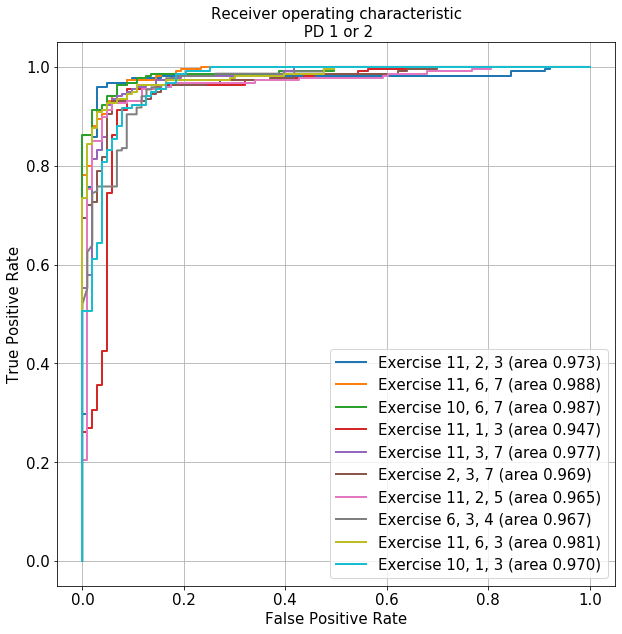

In [61]:
df = get_best_pd_dataframe_pairs(parkinson_accuracy_per_pair)
exer_list = df['pair'].to_list()
max_values = df['max'].to_list()
model_names = df['model name'].to_list()
df.head(10)
is_exer_in = {i : [] for i in range(1,12)}
for i in df.index:
    pair =df['pair'][i]
    for k in range(1,12):
        if k in pair:
            is_exer_in[k].append(1)
        else:
            is_exer_in[k].append(0)
            
for i in range(1,12):
    df[i] = is_exer_in[i]
df.head(10)
def pair_to_str(pair):
    sss = ''
    for el in pair:
        sss = sss + str(el) + ', '
    sss = sss[:-2]
    return sss
data_to_plot = pd.DataFrame()
plt.figure(figsize = (10,10))
for pair, model in zip(exer_list[:10], model_names[:10]):
#     if len(pair) == 2:
#         continue
    data_to_plot[pair] = parkinson_results[pair][model]
    pair_str = pair_to_str(pair)
    real, pred = get_total(parkinson_results_per_pair[pair][model], parkinson_results_per_pair[pair]['target'] )
    print(real.shape, pred.shape)
    fpr, tpr, _= roc_curve(real, pred[:, 1])
    area = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = 'Exercise ' + pair_str + ' (area %.3f)' % area, linewidth =2 )

FS = 15
plt.xlabel('False Positive Rate', fontsize= FS)
plt.ylabel('True Positive Rate', fontsize= FS)
plt.title('Receiver operating characteristic\n PD 1 or 2', fontsize= FS)
plt.legend(loc="up right", fontsize= FS)
plt.grid()
plt.xticks(np.arange(0, 101, 20)/100, fontsize = FS)
plt.yticks(np.arange(0, 101, 20)/100, fontsize = FS)
#     print(pair, pair_str)
#     data_to_plot[pair_str] = pon_result[pair][model]

### PARKINSON 

In [26]:
df = get_best_pd_dataframe_pairs(bin_accuracy_per_pair)
exer_list = df['pair'].to_list()
max_values = df['max'].to_list()
model_names = df['model name'].to_list()
df.head(10)
is_exer_in = {i : [] for i in range(1,12)}
for i in df.index:
    pair =df['pair'][i]
    for k in range(1,12):
        if k in pair:
            is_exer_in[k].append(1)
        else:
            is_exer_in[k].append(0)
            
for i in range(1,12):
    df[i] = is_exer_in[i]
df.head(10)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,rbf SVM,KNN,LR,max,model name,pair,...,2,3,4,5,6,7,8,9,10,11
56,0.885733,0.908864,0.905204,0.90313,0.93028,0.889663,0.884108,0.93028,rbf SVM,"(2, 3)",...,1,1,0,0,0,0,0,0,0,0
222,0.891103,0.893932,0.905492,0.889497,0.926613,0.880773,0.864854,0.926613,rbf SVM,"(2, 3, 5)",...,1,1,0,1,0,0,0,0,0,0
197,0.925147,0.906541,0.895603,0.904794,0.879531,0.893894,0.696217,0.925147,RF 30 5,"(8, 1, 3)",...,0,1,0,0,0,0,1,0,0,0
169,0.895797,0.897197,0.90806,0.923601,0.835109,0.871506,0.85511,0.923601,RF 60 5,"(6, 3, 4)",...,0,1,1,0,1,0,0,0,0,0
133,0.905293,0.895296,0.922862,0.90128,0.885196,0.899488,0.842838,0.922862,RF 50 5,"(10, 1, 3)",...,0,1,0,0,0,0,0,0,1,0
186,0.873092,0.916916,0.920257,0.906279,0.91737,0.880292,0.83677,0.920257,RF 50 5,"(9, 2, 3)",...,1,1,0,0,0,0,0,1,0,0
52,0.885554,0.904371,0.918772,0.914663,0.860823,0.87459,0.829095,0.918772,RF 50 5,"(1, 3)",...,0,1,0,0,0,0,0,0,0,0
201,0.909267,0.918695,0.911943,0.904563,0.899731,0.891141,0.712762,0.918695,RF 40 5,"(8, 2, 3)",...,1,1,0,0,0,0,1,0,0,0
161,0.908269,0.910797,0.91748,0.918062,0.882641,0.85656,0.828058,0.918062,RF 60 5,"(6, 1, 3)",...,0,1,0,0,1,0,0,0,0,0
170,0.905372,0.872875,0.893561,0.915741,0.869248,0.849294,0.834689,0.915741,RF 60 5,"(6, 3, 5)",...,0,1,0,1,1,0,0,0,0,0


In [35]:
bin_results_per_pair.keys()

dict_keys([(11,), 'pair', (10,), (6,), (9,), (8,), (1,), (2,), (3,), (4,), (5,), (7,), (11, 10), (11, 6), (11, 9), (11, 8), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 7), (10, 6), (10, 9), (10, 8), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 7), (6, 9), (6, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (9, 8), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 7), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (2, 3), (2, 4), (2, 5), (2, 7), (3, 4), (3, 5), (3, 7), (4, 5), (4, 7), (5, 7), (11, 10, 6), (11, 10, 9), (11, 10, 8), (11, 10, 1), (11, 10, 2), (11, 10, 3), (11, 10, 4), (11, 10, 5), (11, 10, 7), (11, 6, 9), (11, 6, 8), (11, 6, 1), (11, 6, 2), (11, 6, 3), (11, 6, 4), (11, 6, 5), (11, 6, 7), (11, 9, 8), (11, 9, 1), (11, 9, 2), (11, 9, 3), (11, 9, 4), (11, 9, 5), (11, 9, 7), (11, 8, 1), (11, 8, 2), (11, 8, 3), (11, 8, 4), (11, 8, 5), (11, 8, 7), (11, 1, 2), (11, 1, 3), (11, 1, 4), (11, 1, 5), (11, 1, 7), (11, 2, 3), (11, 2, 4), 

Text(0.5, 0, 'Importance')

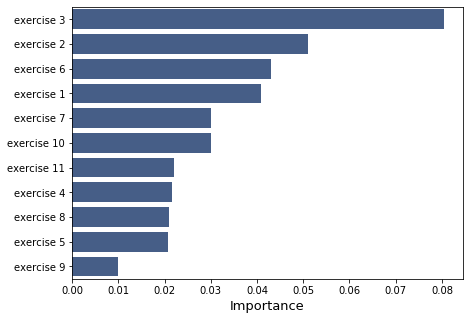

In [140]:
exer_importance_ = {}
total_mean, total_len = df.mean()['max'], len(df)
for key in bin_results_per_pair.keys():
    if key =='pair':
        continue
    chosen_ds = df.copy()
#     print(key)
    if len(key) != 1:
        continue
    for i in key:
        chosen_ds = chosen_ds[chosen_ds[i] == 1]
    with_v, len_v = chosen_ds.mean()['max'], len(chosen_ds)
    diff = with_v - (total_mean*total_len - with_v*len_v)/(total_len - len_v)
    exer_importance_[key] = diff
values = np.array(list(exer_importance_.values()))
values -= values.min() - 0.01
indexs = np.argsort(values, )
pairs = list(exer_importance_.keys())
exer_importance = {i : 0 for i in range(1, 12)}
for pair, value in  zip(pairs, values):
    for exer in pair:
        exer_importance[exer] += value
values_list = pd.DataFrame({i : [exer_importance[i]] for i in exer_importance }).T.sort_values(by = 0, ascending = False)[0].to_dict()
names = ['exercise ' + str(i) for i in values_list.keys()]
values_list = pd.Series(np.array(list(values_list.values())), index = names).T
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = values_list, y= names, palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Importance', fontsize = 13)


Text(0.5, 0, 'Importance')

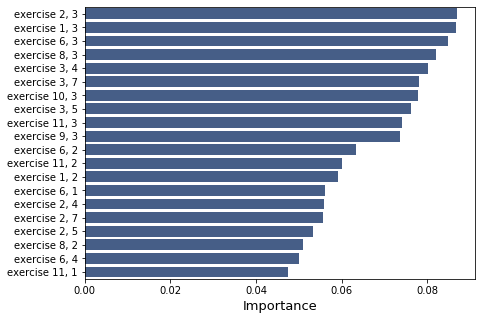

In [138]:
exer_importance_ = {}
TOP_N = 20
total_mean, total_len = df.mean()['max'], len(df)
for key in bin_results_per_pair.keys():
    if key =='pair':
        continue
    chosen_ds = df.copy()
#     print(key)
    if len(key) != 2:
        continue
    for i in key:
        chosen_ds = chosen_ds[chosen_ds[i] == 1]
    with_v, len_v = chosen_ds.mean()['max'], len(chosen_ds)
    diff = with_v - (total_mean*total_len - with_v*len_v)/(total_len - len_v)
    exer_importance_[key] = diff
values = np.array(list(exer_importance_.values()))
values -= values.min() - 0.01
indexs = np.argsort(values, )
pairs = list(exer_importance_.keys())
# exer_importance = {i : 0 for i in range(1, 12)}
exer_importance = {}
for pair, value in  zip(pairs, values):
#     for exer in pair:
    exer_importance[pair_to_str(pair)] = value
values_list = pd.DataFrame({i : [exer_importance[i]] for i in exer_importance }).T.sort_values(by = 0, ascending = False)[0].to_dict()
names = ['exercise ' + str(i) for i in list(values_list.keys())[:TOP_N]]
values_list = pd.Series(np.array(list(values_list.values()))[:TOP_N], index = names).T
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = values_list, y= names, palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Importance', fontsize = 13)


Text(0.5, 0, 'Importance')

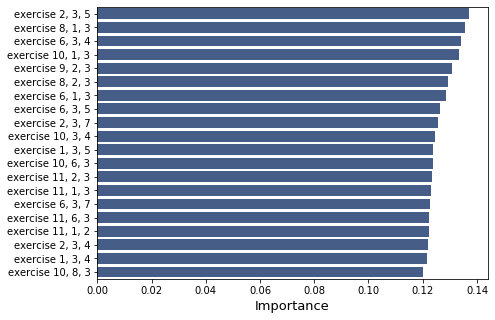

In [139]:
exer_importance_ = {}
TOP_N = 20
total_mean, total_len = df.mean()['max'], len(df)
for key in bin_results_per_pair.keys():
    if key =='pair':
        continue
    chosen_ds = df.copy()
#     print(key)
    if len(key) != 3:
        continue
    for i in key:
        chosen_ds = chosen_ds[chosen_ds[i] == 1]
    with_v, len_v = chosen_ds.mean()['max'], len(chosen_ds)
    diff = with_v - (total_mean*total_len - with_v*len_v)/(total_len - len_v)
    exer_importance_[key] = diff
values = np.array(list(exer_importance_.values()))
values -= values.min() - 0.01
indexs = np.argsort(values, )
pairs = list(exer_importance_.keys())
# exer_importance = {i : 0 for i in range(1, 12)}
exer_importance = {}
for pair, value in  zip(pairs, values):
#     for exer in pair:
    exer_importance[pair_to_str(pair)] = value
values_list = pd.DataFrame({i : [exer_importance[i]] for i in exer_importance }).T.sort_values(by = 0, ascending = False)[0].to_dict()
names = ['exercise ' + str(i) for i in list(values_list.keys())[:TOP_N]]
values_list = pd.Series(np.array(list(values_list.values()))[:TOP_N], index = names).T
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = values_list, y= names, palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Importance', fontsize = 13)


In [124]:
for i in indexs[-20:]:
    print(pairs[i], values[i])

(9,) 0.010000000000000002
(5,) 0.020675286201067837
(8,) 0.021073476778722726
(4,) 0.021715341510771806
(11,) 0.022055259592409608
(10,) 0.030106093668367688
(7,) 0.03013678861743207
(1,) 0.04092264265638323
(6,) 0.04299847080173324
(2,) 0.051040229610519676
(3,) 0.08047457720354712


Text(0.5, 0, 'Importance')

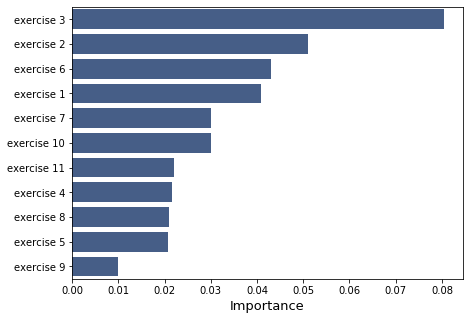

Text(0.5, 0, 'Importance')

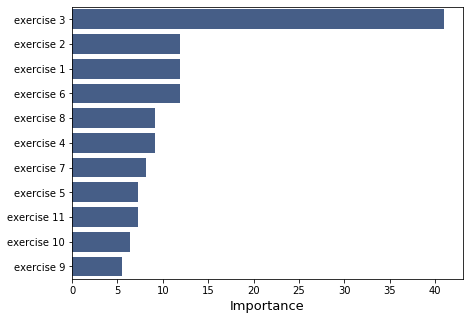

In [112]:
exer_importance = {i : 0 for i in range(1, 12)}
for pair, value in  zip(exer_list[:50], max_values[:50]):
    for exer in pair:
        exer_importance[exer] += value
values = pd.DataFrame({i : [exer_importance[i]] for i in exer_importance }).T.sort_values(by = 0, ascending = False)[0].to_dict()
names = ['exercise ' + str(i) for i in values.keys()]
values = pd.Series(np.array(list(values.values())), index = names).T
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = values, y= names, palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Importance', fontsize = 13)


In [136]:
parkinson_results_per_pair[(11,)]['RF 30 5'][0].shape

(4, 2)

In [32]:
def get_fpr_tpr(real_total1, pred_total1, N_classes = 12):
    y = label_binarize(real_total1, classes= np.arange(N_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(N_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_total1[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), pred_total1.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(12)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(N_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= N_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

def get_total(pred_ser, real_ser):
    pred_total, real_total = np.array([[]]), np.array([])
    for i, (pred, real) in enumerate(zip(pred_ser, real_ser)):
    #     print(pred.shape, real.shape)
        if i == 0:
            pred_total = pred
        else:
            pred_total = np.concatenate((pred_total, pred))

        real_total = np.concatenate((real_total, real))
    return real_total, pred_total
def pair_to_str(pair):
    sss = ''
    for el in pair:
        sss = sss + str(el) + ', '
    sss = sss[:-2]
    return sss

In [138]:
real, pred = get_total(bin_results_per_pair[(11,)]['RF 30 5'], bin_results_per_pair[(11,)]['target'], )

In [139]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)
(436,) (436, 2)


([<matplotlib.axis.YTick at 0x2056c522748>,
 <a list of 6 Text yticklabel objects>)

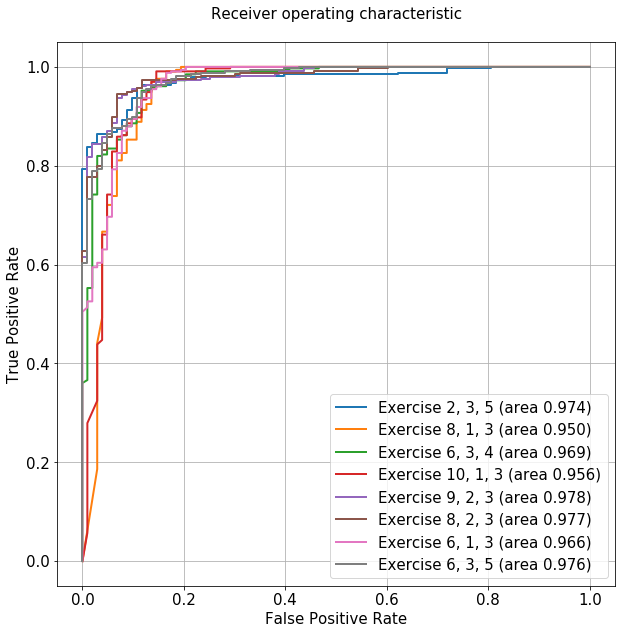

In [152]:

data_to_plot = pd.DataFrame()
plt.figure(figsize = (10,10))
for pair, model in zip(exer_list[:10], model_names[:10]):
    if len(pair) == 2:
        continue
    data_to_plot[pair] = bin_result[pair][model]
    pair_str = pair_to_str(pair)
    real, pred = get_total(bin_results_per_pair[pair][model], bin_results_per_pair[pair]['target'] )
    print(real.shape, pred.shape)
    fpr, tpr, _= roc_curve(real, pred[:, 1])
    area = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = 'Exercise ' + pair_str + ' (area %.3f)' % area, linewidth =2 )

FS = 15
plt.xlabel('False Positive Rate', fontsize= FS)
plt.ylabel('True Positive Rate', fontsize= FS)
plt.title('Receiver operating characteristic\n', fontsize= FS)
plt.legend(loc="up right", fontsize= FS)
plt.grid()
plt.xticks(np.arange(0, 101, 20)/100, fontsize = FS)
plt.yticks(np.arange(0, 101, 20)/100, fontsize = FS)
#     print(pair, pair_str)
#     data_to_plot[pair_str] = pon_result[pair][model]

Text(0, 0.5, 'Accuracy')

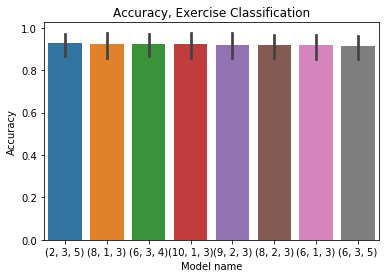

In [153]:
sns.barplot(data = data_to_plot
           )

plt.title("Accuracy, Exercise Classification")
plt.xlabel('Model name')
plt.ylabel('Accuracy')

# Parkinson or Not

In [154]:
df = get_best_pd_dataframe_pairs(pon_accuracy_per_pair)
exer_list = df['pair'].to_list()
max_values = df['max'].to_list()
model_names = df['model name'].to_list()
df.head(10)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,rbf SVM,KNN,LR,max,model name,pair
219,0.665892,0.717243,0.755523,0.738063,0.711656,0.657209,0.622293,0.755523,RF 50 5,"(1, 4, 7)"
52,0.682305,0.679154,0.702146,0.686397,0.746254,0.702671,0.726657,0.746254,rbf SVM,"(1, 3)"
84,0.743337,0.700439,0.681895,0.680225,0.60429,0.55932,0.621908,0.743337,RF 30 5,"(11, 9, 1)"
215,0.643447,0.742921,0.67295,0.686198,0.733739,0.64406,0.663113,0.742921,RF 40 5,"(1, 3, 4)"
182,0.722715,0.738892,0.709875,0.704195,0.70005,0.677536,0.680384,0.738892,RF 40 5,"(9, 1, 3)"
230,0.626437,0.658114,0.651678,0.676007,0.736098,0.666766,0.656973,0.736098,rbf SVM,"(4, 5, 7)"
227,0.642091,0.664943,0.693321,0.653129,0.732833,0.612721,0.673251,0.732833,rbf SVM,"(3, 4, 5)"
183,0.693853,0.727274,0.683378,0.732213,0.662831,0.579378,0.68844,0.732213,RF 60 5,"(9, 1, 4)"
191,0.654949,0.670676,0.640699,0.655458,0.73038,0.65808,0.686617,0.73038,rbf SVM,"(9, 3, 5)"
224,0.615054,0.649119,0.630906,0.622047,0.730037,0.647384,0.620392,0.730037,rbf SVM,"(2, 4, 5)"


Text(0.5, 0, 'Importance')

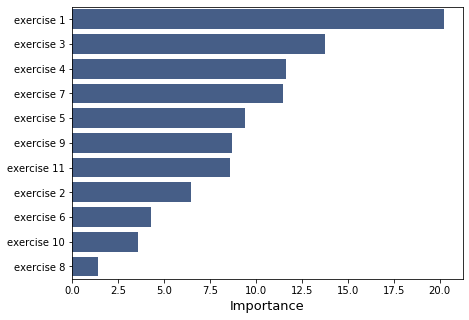

In [155]:
exer_importance = {i : 0 for i in range(1, 12)}
for pair, value in  zip(exer_list[:50], max_values[:50]):
    for exer in pair:
        exer_importance[exer] += value
values = pd.DataFrame({i : [exer_importance[i]] for i in exer_importance }).T.sort_values(by = 0, ascending = False)[0].to_dict()
names = ['exercise ' + str(i) for i in values.keys()]
values = pd.Series(np.array(list(values.values())), index = names).T
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x = values, y= names, palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Importance', fontsize = 13)


(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)
(333,) (333, 2)


([<matplotlib.axis.YTick at 0x2056cbeef60>,
 <a list of 6 Text yticklabel objects>)

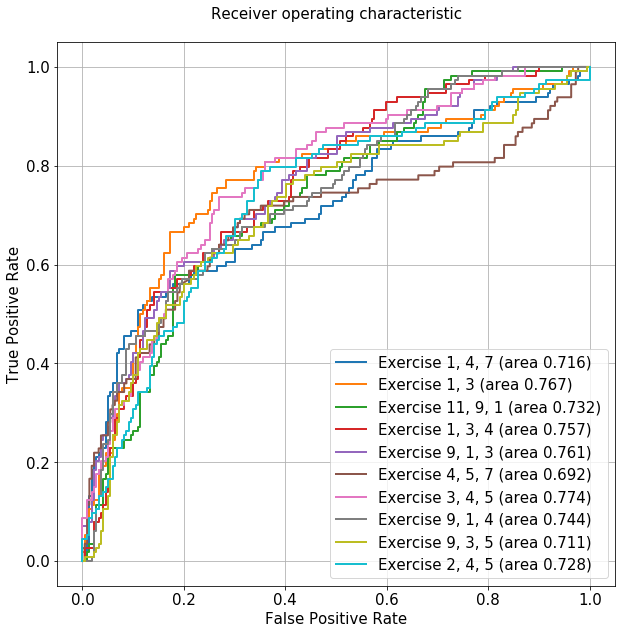

In [158]:
def pair_to_str(pair):
    sss = ''
    for el in pair:
        sss = sss + str(el) + ', '
    sss = sss[:-2]
    return sss
data_to_plot = pd.DataFrame()
plt.figure(figsize = (10,10))
for pair, model in zip(exer_list[:10], model_names[:10]):
#     if len(pair) == 2:
#         continue
    data_to_plot[pair] = pon_result[pair][model]
    pair_str = pair_to_str(pair)
    real, pred = get_total(pon_results_per_pair[pair][model], pon_results_per_pair[pair]['target'] )
    print(real.shape, pred.shape)
    fpr, tpr, _= roc_curve(real, pred[:, 1])
    area = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = 'Exercise ' + pair_str + ' (area %.3f)' % area, linewidth =2 )

FS = 15
plt.xlabel('False Positive Rate', fontsize= FS)
plt.ylabel('True Positive Rate', fontsize= FS)
plt.title('Receiver operating characteristic\n', fontsize= FS)
plt.legend(loc="up right", fontsize= FS)
plt.grid()
plt.xticks(np.arange(0, 101, 20)/100, fontsize = FS)
plt.yticks(np.arange(0, 101, 20)/100, fontsize = FS)
#     print(pair, pair_str)
#     data_to_plot[pair_str] = pon_result[pair][model]

In [ ]:
#

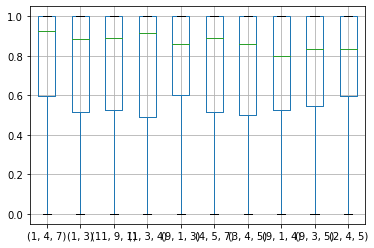

In [160]:
data_to_plot.boxplot()

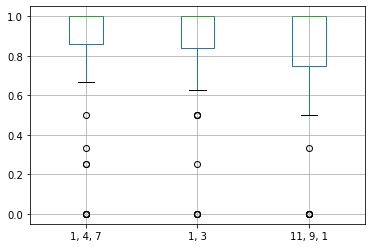

In [92]:
data_to_plot.boxplot()

In [174]:
len(values)

11

In [87]:
parkinson_results_per_pair.to_pickle('C:/Files/parkinson/combine_exercise_parkinson_results_per_pair.pkl')
bin_results_per_pair.to_pickle('C:/Files/parkinson/combine_exercise_bin_results_per_pair.pkl')
total_results_per_pair.to_pickle('C:/Files/parkinson/combine_exercise_total_results_per_pair.pkl')

In [2]:
parkinson_results_per_pair = pd.read_pickle('C:/Files/parkinson/combine_exercise_parkinson_results_per_pair.pkl')
bin_results_per_pair       = pd.read_pickle('C:/Files/parkinson/combine_exercise_bin_results_per_pair.pkl')
total_results_per_pair     = pd.read_pickle('C:/Files/parkinson/combine_exercise_total_results_per_pair.pkl')

In [10]:
total_results_per_pair.sort_values(by='RF 40 5', ascending= False)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,KNN,LR,pair,group
510,0.719504,0.740456,0.592774,0.610017,0.406491,0.385235,"(9, 1, 3, 4)","[GM, GM, GM, FM]"
475,0.610952,0.705353,0.604077,0.471523,0.342205,0.410891,"(6, 1, 3, 4)","[GM, GM, GM, FM]"
454,0.424325,0.696899,0.566104,0.436833,0.287286,0.400289,"(6, 9, 4, 7)","[GM, GM, FM, FM]"
511,0.444199,0.674882,0.678023,0.413360,0.365859,0.430225,"(9, 1, 3, 5)","[GM, GM, GM, FM]"
444,0.422453,0.673519,0.569178,0.547486,0.382309,0.426698,"(6, 9, 1, 5)","[GM, GM, GM, FM]"
294,0.408822,0.668134,0.533468,0.550598,0.326547,0.350485,"(11, 6, 5, 7)","[FM, GM, FM, FM]"
455,0.402751,0.656419,0.529792,0.557560,0.321193,0.384077,"(6, 9, 5, 7)","[GM, GM, FM, FM]"
546,0.431980,0.621038,0.444980,0.459033,0.423816,0.369871,"(1, 2, 3, 4)","[GM, CE, GM, FM]"
471,0.437459,0.619645,0.429876,0.442889,0.333046,0.386426,"(6, 1, 2, 3)","[GM, GM, CE, GM]"
488,0.600394,0.618703,0.704167,0.624191,0.296315,0.386072,"(6, 3, 4, 7)","[GM, GM, FM, FM]"


In [11]:
def maximum_pair_and_classifier(df):

    columns = df.columns
    classifier_name = columns[np.argmax(df.drop(columns = ['pair', 'group']).max().values)]
    value = np.max(df.drop(columns = ['pair', 'group']).max().values)
    pair = df[df[classifier_name] == value]['pair'].values[0]
    return value, pair, classifier_name

In [30]:
print(maximum_pair_and_classifier(bin_results_per_pair))
print(maximum_pair_and_classifier(parkinson_results_per_pair))
print(maximum_pair_and_classifier(total_results_per_pair))

(0.9702350859453994, (6, 1, 2, 3), 'RF 40 5')
(0.8778286295448767, (9, 1, 2, 4), 'RF 40 5')
(0.7404563099685051, (9, 1, 3, 4), 'RF 40 5')


In [31]:
bin_results_per_pair.drop(columns = ['pair', 'group']).max()

RF 30 5    0.965709
RF 40 5    0.970235
RF 50 5    0.968081
RF 60 5    0.964231
KNN        0.910435
LR         0.935992
dtype: float64

In [25]:
def small_predict(train_features, test_features, classifiers, 
                  parkinson_stage = True, balanced_accuracy = True, return_proba = False):
    X_train = train_features
    X_test  = test_features
    y_train = X_train['target']
    y_test  = X_test['target']

    X_train = X_train.drop(columns= ['target'])
    X_test  = X_test.drop(columns= ['target'])

    X_train = pm.sclr.fit_transform(X_train)
    X_test  = pm.sclr.transform(X_test)
    df = pd.DataFrame()
#     df['train_len'] = [len(y_train)]
#     df['test_len'] = [len(y_test)]
#     print(y_test.shape, y_train.shape)
    for key in classifiers:
#         print(key)
        model = classifiers[key]
        model.fit(X_train, y_train)
        if return_proba:
            y_pred = [model.predict_proba(X_test)]
        else:
            y_pred = model.predict(X_test)
#         print(len(y_pred))
        s = y_pred
        df[key] = y_pred
    
#     df['target'] = y_test
    

    return df

def predict_per_person(df, classifiers, features, return_proba = False):
    results_with_double_exercise = pd.DataFrame()
    for name in df['name'].unique():
        test  = df[df['name'] == name][features + ['target']]
        train = df[df['name'] != name][features + ['target']]
        results = small_predict(train, test, classifiers, parkinson_stage = False, balanced_accuracy = False, return_proba = return_proba)
#         print(results.shape, test.shape)
#         print(test['target'])
        if return_proba:
            results['target'] = [test['target'].values]
        else:
            results['target'] = test['target'].values
#         print(results['target'])
#         results['name'] = name
        results_with_double_exercise = results_with_double_exercise.append(results, ignore_index = True)
    return results_with_double_exercise
def predict_per_pair(df, pair, classifiers, features_dct):
    feature_names = []
    for first in pair:
        feature_names += features_dct[first]
    datka = predict_per_person(df, classifiers, feature_names, return_proba = True)
    for i in datka.index:
        if i == 0:
            y_pred = datka[datka.columns[0]][0]
            y_true = np.array(datka['target'][0])
            continue
        y_pred = np.concatenate((y_pred, datka[datka.columns[0]][i]))
        y_true = np.concatenate((y_true, datka['target'][i]))
    return y_pred, y_true


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
data = Parkinson_total_df
data['target'] = np.array(data['target'] > 0.5, dtype = np.int)
_, pair, clas_name = maximum_pair_and_classifier(parkinson_results_per_pair)
y_pred, y_true = predict_per_pair(data, pair, {'RF' : classifiers[clas_name]}, features_dct)
fpr, tpr = dict(), dict()
fpr['parkinson or healthy'], tpr['parkinson or healthy'], _ = roc_curve(y_true, y_pred[:,1])

data = bin_total_df
data['target'] = np.array(data['target'] > 0.5, dtype = np.int)
_, pair, clas_name = maximum_pair_and_classifier(bin_results_per_pair)
y_pred, y_true = predict_per_pair(data, pair, {'RF' : classifiers[clas_name]}, features_dct)
fpr['early detection'], tpr['early detection'], _ = roc_curve(y_true, y_pred[:,1])

data = pon_total_df
# data['target'] = np.array(data['target'] > 3.5, dtype = np.int)
_, pair, clas_name = maximum_pair_and_classifier(total_results_per_pair)
y_pred, y_true = predict_per_pair(data, pair, {'RF' : classifiers[clas_name]}, features_dct)
fpr['Parkinson or not'], tpr['Parkinson or not'], _ = roc_curve(y_true, y_pred[:,1])



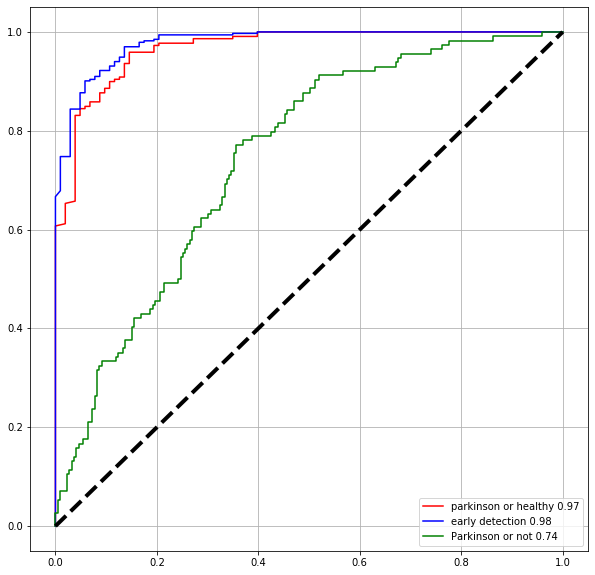

In [38]:
plt.figure(figsize = (10,10))
colors = [ 'r', 'b', 'g']
for i, key in enumerate(fpr):
    plt.plot(fpr[key], tpr[key], label = key + ' %.2f' % auc(fpr[key], tpr[key]), c = colors[i])
plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.legend()
plt.grid()

In [39]:
import sklearn 
print(sklearn.metrics.classification_report(y_true, np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       219
           1       0.53      0.49      0.51       114

    accuracy                           0.68       333
   macro avg       0.64      0.63      0.64       333
weighted avg       0.67      0.68      0.68       333



In [127]:
y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 1., 1.

In [123]:
pm.balanced_accuracy_score(np.argmax(y_pred, axis = 1), y_true)

0.6433025911286782

In [124]:
np.concatenate((res['RF'][1], res['RF'][0]))

array([[9.19940602e-01, 2.13389058e-02, 5.76998108e-02, 1.02068105e-03],
       [7.81055624e-01, 1.89378680e-01, 2.85450150e-02, 1.02068105e-03],
       [7.80413039e-01, 1.66154065e-01, 2.77286714e-02, 2.57042254e-02],
       [6.08150527e-01, 2.65190419e-01, 9.73833994e-02, 2.92756539e-02],
       [7.30185689e-01, 1.91381414e-01, 7.77286714e-02, 7.04225352e-04],
       [8.13604251e-01, 9.97287253e-02, 8.59627984e-02, 7.04225352e-04],
       [9.13794298e-01, 8.01693290e-02, 5.71991709e-03, 3.16455696e-04],
       [9.05566006e-01, 6.58637927e-02, 2.50495200e-02, 3.52068105e-03],
       [8.31207032e-01, 1.40222767e-01, 2.50495200e-02, 3.52068105e-03],
       [7.31862035e-01, 2.14567764e-01, 5.00495200e-02, 3.52068105e-03],
       [8.19679254e-01, 1.48556100e-01, 3.07439644e-02, 1.02068105e-03],
       [9.43358555e-01, 1.12087656e-02, 3.86271241e-02, 6.80555556e-03],
       [8.94920421e-01, 4.35617068e-02, 4.53290859e-02, 1.61887865e-02],
       [8.83531583e-01, 1.51337477e-02, 9.16089725e

In [26]:
def maximum_pair_and_classifier(df):
    value = df.drop(columns = ['pair', 'group']).max()a

RF 30 5            0.876591
RF 40 5            0.877829
RF 50 5            0.872787
RF 60 5            0.877201
KNN                 0.68478
LR                 0.675902
pair         (11, 10, 9, 8)
group      [TR, GM, GM, FM]
dtype: object

In [206]:
# parkinson_results_per_pair = parkinson_results_per_pair.iloc[:561]
parkinson_results_per_pair['pair'] = iter_list

# bin_results_per_pair = bin_results_per_pair.iloc[:561]
bin_results_per_pair['pair'] = iter_list

# early_results_per_pair = early_results_per_pair.iloc[:561]
total_results_per_pair['pair'] = iter_list

In [199]:
exer_group = {1 : 'GM', 2 : 'CE', 3 : 'GM', 4 : 'FM',
              5 : 'FM', 6 : 'GM', 7 : 'FM', 8 : 'TR',
              9 : 'GM', 10 : 'FM', 11 : 'FM', 
              12 : 'CE', 13 : 'CE', 14 : 'CE'}
def add_group(df):
    G_list = []
    for pair in df['pair'].values:
        g_pair = []
        for val in pair:
            g_pair.append(exer_group[val])
        G_list.append(g_pair)
#     print(G_list)
    return G_list

In [75]:
parkinson_results_per_pair['group'] = add_group(parkinson_results_per_pair)
bin_results_per_pair['group'] = add_group(bin_results_per_pair)
total_results_per_pair['group'] = add_group(total_results_per_pair)

In [78]:
bin_results_per_pair.sort_values(by = 'RF 40 5', ascending= False).head(10)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,KNN,LR,pair,group
471,0.946155,0.970235,0.947893,0.949632,0.849961,0.839672,"(6, 1, 2, 3)","[GM, GM, CE, GM]"
160,0.953211,0.962718,0.942682,0.953211,0.850315,0.833664,"(6, 1, 2)","[GM, GM, CE]"
114,0.922017,0.959718,0.925209,0.922917,0.868918,0.909577,"(10, 6, 2)","[FM, GM, CE]"
317,0.923211,0.958266,0.945132,0.914381,0.814720,0.858756,"(11, 8, 1, 3)","[FM, TR, GM, GM]"
341,0.885594,0.952936,0.925209,0.939953,0.824095,0.901997,"(11, 2, 3, 4)","[FM, CE, GM, FM]"
161,0.925209,0.951591,0.932209,0.932593,0.848681,0.845070,"(6, 1, 3)","[GM, GM, GM]"
464,0.929596,0.951591,0.930750,0.925741,0.833333,0.855106,"(6, 8, 2, 7)","[GM, TR, CE, FM]"
133,0.922017,0.950927,0.933999,0.932593,0.857647,0.887731,"(10, 1, 3)","[FM, GM, GM]"
280,0.951252,0.949974,0.960212,0.960212,0.783143,0.850315,"(11, 6, 1, 2)","[FM, GM, GM, CE]"
365,0.923916,0.949974,0.927705,0.942855,0.857694,0.892966,"(10, 6, 1, 3)","[FM, GM, GM, GM]"


In [80]:
parkinson_results_per_pair.sort_values(by = 'RF 60 5', ascending= False).head(10)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,KNN,LR,pair,group
272,0.542250,0.528803,0.814037,0.877201,0.560838,0.479279,"(11, 6, 9, 5)","[FM, GM, GM, FM]"
511,0.480667,0.520085,0.527287,0.868908,0.420585,0.422269,"(9, 1, 3, 5)","[GM, GM, GM, FM]"
452,0.524936,0.534489,0.524205,0.868040,0.366735,0.457152,"(6, 9, 3, 7)","[GM, GM, GM, FM]"
476,0.710297,0.567069,0.540807,0.865623,0.627849,0.458342,"(6, 1, 3, 5)","[GM, GM, GM, FM]"
152,0.489544,0.758127,0.606770,0.864819,0.419230,0.435535,"(6, 9, 5)","[GM, GM, FM]"
165,0.409722,0.804252,0.548214,0.823934,0.401163,0.423866,"(6, 2, 3)","[GM, CE, GM]"
481,0.815706,0.807922,0.541933,0.822629,0.515703,0.420071,"(6, 2, 3, 4)","[GM, CE, GM, FM]"
446,0.532729,0.544387,0.816610,0.820738,0.407504,0.416971,"(6, 9, 2, 3)","[GM, GM, CE, GM]"
235,0.405323,0.529244,0.536234,0.817250,0.368435,0.505123,"(11, 10, 6, 3)","[FM, FM, GM, GM]"
223,0.540381,0.543004,0.811987,0.816749,0.413974,0.434814,"(2, 3, 7)","[CE, GM, FM]"


In [86]:
total_results_per_pair.sort_values(by = 'RF 40 5', ascending= False).head(10)

,RF 30 5,RF 40 5,RF 50 5,RF 60 5,KNN,LR,pair,group
510,0.719504,0.740456,0.592774,0.610017,0.406491,0.385235,"(9, 1, 3, 4)","[GM, GM, GM, FM]"
475,0.610952,0.705353,0.604077,0.471523,0.342205,0.410891,"(6, 1, 3, 4)","[GM, GM, GM, FM]"
454,0.424325,0.696899,0.566104,0.436833,0.287286,0.400289,"(6, 9, 4, 7)","[GM, GM, FM, FM]"
511,0.444199,0.674882,0.678023,0.413360,0.365859,0.430225,"(9, 1, 3, 5)","[GM, GM, GM, FM]"
444,0.422453,0.673519,0.569178,0.547486,0.382309,0.426698,"(6, 9, 1, 5)","[GM, GM, GM, FM]"
294,0.408822,0.668134,0.533468,0.550598,0.326547,0.350485,"(11, 6, 5, 7)","[FM, GM, FM, FM]"
455,0.402751,0.656419,0.529792,0.557560,0.321193,0.384077,"(6, 9, 5, 7)","[GM, GM, FM, FM]"
546,0.431980,0.621038,0.444980,0.459033,0.423816,0.369871,"(1, 2, 3, 4)","[GM, CE, GM, FM]"
471,0.437459,0.619645,0.429876,0.442889,0.333046,0.386426,"(6, 1, 2, 3)","[GM, GM, CE, GM]"
488,0.600394,0.618703,0.704167,0.624191,0.296315,0.386072,"(6, 3, 4, 7)","[GM, GM, FM, FM]"


### Health/Sick person
1 exercise

In [210]:
bin_results_per_pair.iloc[:11].sort_values(by = 'RF', ascending= False)

,RF,KNN,LR,pair,group
1,0.854683,0.709158,0.730060,"(10,)",[FM]
6,0.854277,0.776852,0.786908,"(2,)",[CE]
7,0.816023,0.846449,0.791496,"(3,)",[GM]
5,0.807541,0.755741,0.718860,"(1,)",[GM]
8,0.803286,0.725812,0.731654,"(4,)",[FM]
4,0.769858,0.713031,0.730458,"(8,)",[TR]
2,0.766964,0.664876,0.755958,"(6,)",[GM]
10,0.724019,0.748818,0.756399,"(7,)",[FM]
0,0.687412,0.604793,0.639936,"(11,)",[FM]
9,0.679177,0.700676,0.651211,"(5,)",[FM]


2 exercises

In [211]:
bin_results_per_pair.iloc[11:66].sort_values(by = 'RF', ascending= False).head(20)

,RF,KNN,LR,pair,group
33,0.916034,0.819792,0.842491,"(6, 2)","[GM, CE]"
29,0.910567,0.852534,0.822096,"(10, 7)","[FM, FM]"
57,0.907265,0.830357,0.846579,"(2, 4)","[CE, FM]"
25,0.904299,0.776852,0.854254,"(10, 2)","[FM, CE]"
23,0.890574,0.785897,0.750671,"(10, 8)","[FM, TR]"
56,0.890076,0.907488,0.846579,"(2, 3)","[CE, GM]"
51,0.885537,0.816193,0.828175,"(1, 2)","[GM, CE]"
27,0.881169,0.761624,0.784179,"(10, 4)","[FM, FM]"
24,0.876236,0.709904,0.738993,"(10, 1)","[FM, GM]"
16,0.874358,0.795424,0.765220,"(11, 2)","[FM, CE]"


3 exercises

In [212]:
bin_results_per_pair.iloc[66:231].sort_values(by = 'RF', ascending= False).head(20)

,RF,KNN,LR,pair,group
166,0.950829,0.851488,0.890076,"(6, 2, 4)","[GM, CE, FM]"
68,0.939759,0.808333,0.775299,"(11, 10, 8)","[FM, FM, TR]"
91,0.934108,0.851165,0.826291,"(11, 8, 2)","[FM, TR, CE]"
78,0.930354,0.901092,0.860013,"(11, 6, 2)","[FM, GM, CE]"
165,0.930354,0.917959,0.824079,"(6, 2, 3)","[GM, CE, GM]"
114,0.923781,0.838492,0.853016,"(10, 6, 2)","[FM, GM, CE]"
201,0.922486,0.941787,0.841055,"(8, 2, 3)","[TR, CE, GM]"
137,0.922486,0.883185,0.853016,"(10, 2, 3)","[FM, CE, GM]"
223,0.921794,0.876204,0.837130,"(2, 3, 7)","[CE, GM, FM]"
160,0.919402,0.849057,0.840923,"(6, 1, 2)","[GM, GM, CE]"


### First/Second stage
1 exercise

In [213]:
parkinson_results_per_pair.iloc[:11].sort_values(by = 'RF', ascending= False)

,RF,KNN,LR,pair,group
5,0.690727,0.451412,0.486604,"(1,)",[GM]
0,0.599858,0.422487,0.448690,"(11,)",[FM]
7,0.454477,0.450164,0.364111,"(3,)",[GM]
10,0.406036,0.295179,0.314288,"(7,)",[FM]
9,0.366755,0.307522,0.273934,"(5,)",[FM]
6,0.341315,0.343838,0.284223,"(2,)",[CE]
8,0.331328,0.288365,0.348884,"(4,)",[FM]
1,0.320809,0.248337,0.329383,"(10,)",[FM]
2,0.298896,0.336859,0.313550,"(6,)",[GM]
4,0.285033,0.261744,0.305952,"(8,)",[TR]


2 exercises

In [214]:
parkinson_results_per_pair.iloc[11:66].sort_values(by = 'KNN', ascending= False).head(20)

,RF,KNN,LR,pair,group
60,0.353047,0.569275,0.415934,"(3, 4)","[GM, FM]"
16,0.347750,0.555290,0.631862,"(11, 2)","[FM, CE]"
52,0.573311,0.550416,0.525988,"(1, 3)","[GM, GM]"
51,0.672980,0.547712,0.480078,"(1, 2)","[GM, CE]"
42,0.455651,0.499517,0.335019,"(9, 4)","[GM, FM]"
57,0.476923,0.488925,0.331368,"(2, 4)","[CE, FM]"
13,0.504885,0.486217,0.544353,"(11, 9)","[FM, GM]"
15,0.728313,0.481973,0.450281,"(11, 1)","[FM, GM]"
32,0.548207,0.475789,0.538402,"(6, 1)","[GM, GM]"
17,0.361700,0.475485,0.593432,"(11, 3)","[FM, GM]"


3 exercise

In [216]:
parkinson_results_per_pair.iloc[66:231].sort_values(by = 'KNN', ascending= False).head(20)

,RF,KNN,LR,pair,group
215,0.784497,0.696643,0.504152,"(1, 3, 4)","[GM, GM, FM]"
101,0.472765,0.653160,0.667688,"(11, 2, 3)","[FM, CE, GM]"
105,0.390336,0.634317,0.573742,"(11, 3, 4)","[FM, GM, FM]"
75,0.388738,0.595915,0.607292,"(11, 6, 9)","[FM, GM, GM]"
109,0.520491,0.593586,0.467765,"(11, 4, 7)","[FM, FM, FM]"
227,0.349060,0.589986,0.359302,"(3, 4, 5)","[GM, FM, FM]"
160,0.704197,0.562008,0.447445,"(6, 1, 2)","[GM, GM, CE]"
228,0.358454,0.551502,0.385989,"(3, 4, 7)","[GM, FM, FM]"
86,0.529507,0.539881,0.699753,"(11, 9, 3)","[FM, GM, GM]"
187,0.369215,0.537928,0.300821,"(9, 2, 4)","[GM, CE, FM]"


### Health/1 stage Parkinson

In [220]:
total_results_per_pair.iloc[:11].sort_values(by = 'RF', ascending= False)

,RF,KNN,LR,pair,group
5,0.538350,0.398309,0.393539,"(1,)",[GM]
0,0.461292,0.354907,0.481562,"(11,)",[FM]
7,0.370795,0.352748,0.331280,"(3,)",[GM]
1,0.332015,0.181958,0.198141,"(10,)",[FM]
9,0.326215,0.245485,0.223263,"(5,)",[FM]
2,0.299988,0.270830,0.370436,"(6,)",[GM]
8,0.298305,0.266479,0.325383,"(4,)",[FM]
10,0.270779,0.245936,0.282092,"(7,)",[FM]
4,0.248852,0.200421,0.273084,"(8,)",[TR]
3,0.247823,0.291515,0.266088,"(9,)",[GM]


In [221]:
total_results_per_pair.iloc[11:66].sort_values(by = 'RF', ascending= False).head(20)

,RF,KNN,LR,pair,group
52,0.524455,0.479301,0.429682,"(1, 3)","[GM, GM]"
47,0.521706,0.304010,0.376624,"(8, 3)","[TR, GM]"
15,0.496331,0.440963,0.436823,"(11, 1)","[FM, GM]"
54,0.495275,0.353557,0.409280,"(1, 5)","[GM, FM]"
53,0.463792,0.414316,0.413018,"(1, 4)","[GM, FM]"
24,0.459103,0.216748,0.326427,"(10, 1)","[FM, GM]"
13,0.444197,0.386011,0.540948,"(11, 9)","[FM, GM]"
18,0.436111,0.367028,0.414064,"(11, 4)","[FM, FM]"
51,0.430216,0.373373,0.385609,"(1, 2)","[GM, CE]"
41,0.429286,0.430799,0.323214,"(9, 3)","[GM, GM]"


In [222]:
total_results_per_pair.iloc[66:231].sort_values(by = 'RF', ascending= False).head(20)

,RF,KNN,LR,pair,group
98,0.596750,0.457840,0.388045,"(11, 1, 4)","[FM, GM, FM]"
175,0.580662,0.352813,0.438036,"(9, 8, 1)","[GM, TR, GM]"
184,0.575961,0.368945,0.432761,"(9, 1, 5)","[GM, GM, FM]"
161,0.574756,0.444509,0.456092,"(6, 1, 3)","[GM, GM, GM]"
84,0.556419,0.463305,0.493660,"(11, 9, 1)","[FM, GM, GM]"
147,0.534766,0.325799,0.315140,"(6, 9, 8)","[GM, GM, TR]"
133,0.534514,0.372983,0.390531,"(10, 1, 3)","[FM, GM, GM]"
183,0.528799,0.362919,0.476287,"(9, 1, 4)","[GM, GM, FM]"
87,0.527934,0.549021,0.461686,"(11, 9, 4)","[FM, GM, FM]"
182,0.526290,0.438229,0.464292,"(9, 1, 3)","[GM, GM, GM]"
